In [3]:
from pycocotools.coco import COCO
import pandas as pd

In [56]:
df = pd.DataFrame(columns=['file_name', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'])
df = df.astype({"file_name": "string",'width': 'int16', 'height': 'int16', 'class': 'int8'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  0 non-null      string
 1   width      0 non-null      int16 
 2   height     0 non-null      int16 
 3   class      0 non-null      int8  
 4   xmin       0 non-null      object
 5   ymin       0 non-null      object
 6   xmax       0 non-null      object
 7   ymax       0 non-null      object
dtypes: int16(2), int8(1), object(4), string(1)
memory usage: 124.0+ bytes


In [6]:
coco = COCO(annotation_file='../hack2023urban/urbanhack-train/annotations/instances_default.json')

catIds = coco.getCatIds()
imgIds = coco.getImgIds()

loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [51]:
image_example = coco.loadImgs(imgIds[0])
image_example

[{'id': 1,
  'width': 854,
  'height': 572,
  'file_name': '0000019949building.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0}]

In [15]:
annot_example = coco.loadAnns(coco.getAnnIds(imgIds=1))
annot_example

[{'id': 1,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 12677.091699999999,
  'bbox': [98.87, 141.25, 110.63, 114.59],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 2,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 16279.176900000006,
  'bbox': [723.17, 184.07, 130.83, 124.43],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 3,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 13944.253400000007,
  'bbox': [475.7, 48.84, 116.62, 119.57],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 4,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 13847.118300000011,
  'bbox': [593.81, 62.38, 118.89, 116.47],
  'iscrowd': 0,
  'attributes': {'occluded': False, 'rotation': 0.0}},
 {'id': 5,
  'image_id': 1,
  'category_id': 2,
  'segmentation': [],
  'area': 10862.957000000002,
  'bbox': [0.0, 259.95, 81.34, 133.55],
  'i

In [57]:
for img_index in imgIds:
    img = coco.loadImgs(imgIds[img_index-1])[0]
    new_df_row = []
    new_df_row.extend([img['file_name'], img['width'], img['height']])
    for annot in coco.loadAnns(coco.getAnnIds(imgIds=img_index)):  
        tmp = new_df_row.copy()
        tmp.extend([annot['category_id'], annot['bbox'][0], annot['bbox'][1], annot['bbox'][0]+annot['bbox'][2], annot['bbox'][1]+annot['bbox'][3]])
        df.loc[len(df.index)] = tmp
    
    

df

,file_name,width,height,class,xmin,ymin,xmax,ymax
0,0000019949building.jpg,854,572,2,98.87,141.25,209.50,255.84
1,0000019949building.jpg,854,572,2,723.17,184.07,854.00,308.50
2,0000019949building.jpg,854,572,2,475.70,48.84,592.32,168.41
3,0000019949building.jpg,854,572,2,593.81,62.38,712.70,178.85
4,0000019949building.jpg,854,572,2,0.00,259.95,81.34,393.50
...,...,...,...,...,...,...,...,...
38326,20221212_144514.jpg,4160,3120,2,0.00,1383.28,480.68,1968.78
38327,20221212_144514.jpg,4160,3120,2,0.00,919.61,630.00,1387.21
38328,20221212_144514.jpg,4160,3120,2,119.17,510.94,743.96,927.47
38329,20221212_144514.jpg,4160,3120,2,268.49,173.01,842.20,507.01


In [59]:
df.tail(5) 

,file_name,width,height,class,xmin,ymin,xmax,ymax
38326,20221212_144514.jpg,4160,3120,2,0.00,1383.28,480.68,1968.78
38327,20221212_144514.jpg,4160,3120,2,0.00,919.61,630.00,1387.21
38328,20221212_144514.jpg,4160,3120,2,119.17,510.94,743.96,927.47
38329,20221212_144514.jpg,4160,3120,2,268.49,173.01,842.20,507.01
38330,20221212_144514.jpg,4160,3120,2,649.65,499.15,1451.26,931.40


c:\Users\caretaker\Documents\way-to-ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\caretaker\Documents\way-to-ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\caretaker\Documents\way-to-ml\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='class', ylabel='count'>

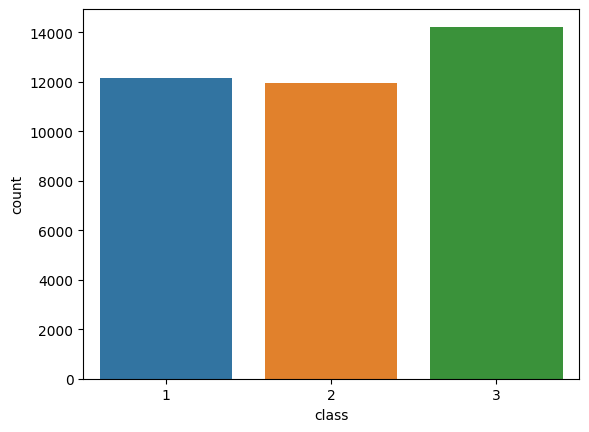

In [60]:
import seaborn as sns
sns.countplot(data=df, x='class')
